<a href="https://colab.research.google.com/github/euclideands/Programming_Dumps/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from scipy.spatial.distance import correlation

# **Read the Data**

In [48]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining/data_p.csv')
df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020/12/01,110,130,409.01
1,60,2020/12/02,117,145,479.00
2,60,2020/12/03,103,135,340.00
3,45,2020/12/04,109,175,282.04
4,45,2020/12/05,117,148,406.00
5,60,2020/12/06,102,127,300.00
6,60,2020/12/07,110,136,374.00
7,450,2020/12/08,104,134,253.03
8,30,2020/12/09,109,133,195.01
9,60,2020/12/10,98,124,269.00


- Duration -> durasi olahraga
- Date -> tanggal melakukan olah raga
- Pulse -> rata-rata detak jantung
- Maxpulse -> detak jantung maksimal
- Calories -> kalori yang terbakar

In [49]:
# Checking the number of rows and columns
df.shape

(32, 5)

In [50]:
# Checking null value and data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


We could see that in column 'Date' and 'Calories' there are missing value. And because the data shape is not considered big enough, we should handle the missing value without deleting it.

# **Handle Missing Value**

In [51]:
# Calculate how many NaN values there are in the data
df.isnull().sum()

Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64

To handle the missing value without deleting it, we will use linear interpolation method.

In [52]:
# Linear interpolation to fill the NaN values in 'Calories' column
df['Calories'].interpolate(method='linear', inplace=True)
df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020/12/01,110,130,409.01
1,60,2020/12/02,117,145,479.00
2,60,2020/12/03,103,135,340.00
3,45,2020/12/04,109,175,282.04
4,45,2020/12/05,117,148,406.00
5,60,2020/12/06,102,127,300.00
6,60,2020/12/07,110,136,374.00
7,450,2020/12/08,104,134,253.03
8,30,2020/12/09,109,133,195.01
9,60,2020/12/10,98,124,269.00


For the 'Date' column, because the NaN value is between the 21st and 23rd and looking at the previous row of data the dates are sequential so it can be assumed that the NaN value is the 22nd.

In [53]:
# fill in the missing value
df['Date'].fillna(date(2020, 12, 22), inplace=True)

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date']).dt.date
df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.01
1,60,2020-12-02,117,145,479.00
2,60,2020-12-03,103,135,340.00
3,45,2020-12-04,109,175,282.04
4,45,2020-12-05,117,148,406.00
5,60,2020-12-06,102,127,300.00
6,60,2020-12-07,110,136,374.00
7,450,2020-12-08,104,134,253.03
8,30,2020-12-09,109,133,195.01
9,60,2020-12-10,98,124,269.00


# **Statistical Measure of Data**

In [54]:
df.describe().round(2)

,Duration,Pulse,Maxpulse,Calories
count,32.00,32.00,32.00,32.00
mean,68.44,103.50,128.50,303.39
std,70.04,7.83,13.00,64.34
min,30.00,90.00,101.00,195.01
25%,60.00,100.00,120.00,250.07
50%,60.00,102.50,127.50,291.02
75%,60.00,106.50,132.25,341.26
max,450.00,130.00,175.00,479.00


<ipython-input-55-d6b0e71e4f4e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pulse'])


<Axes: xlabel='Pulse', ylabel='Density'>

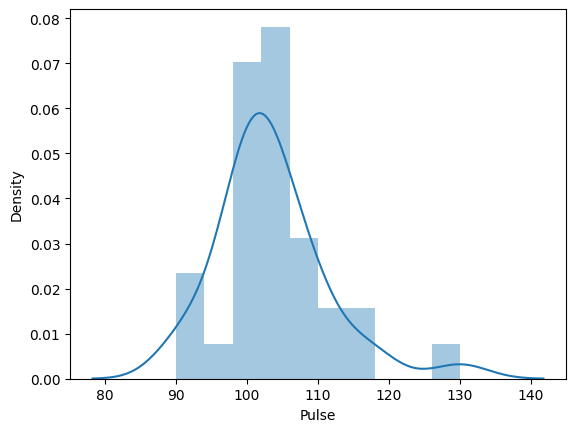

In [55]:
sns.distplot(df['Pulse'])

<ipython-input-56-2c32b4a6c558>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Maxpulse'])


<Axes: xlabel='Maxpulse', ylabel='Density'>

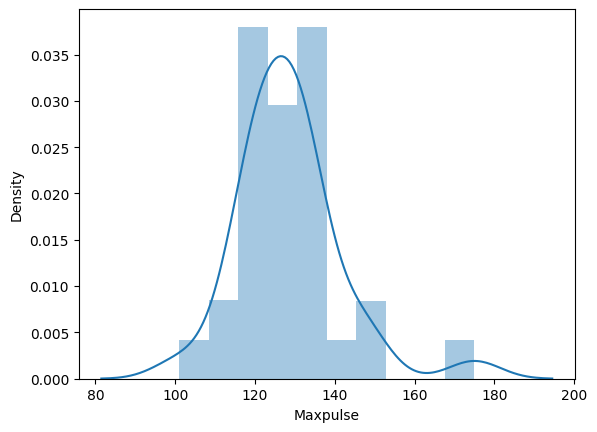

In [56]:
sns.distplot(df['Maxpulse'])

<ipython-input-57-ce4527e9b120>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Calories'])


<Axes: xlabel='Calories', ylabel='Density'>

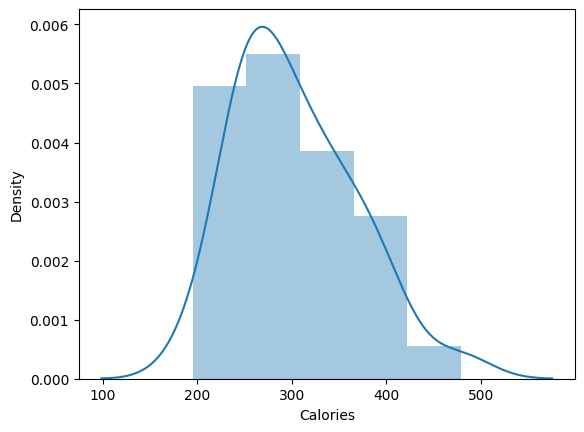

In [57]:
sns.distplot(df['Calories'])

<ipython-input-58-e12fedbb95cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

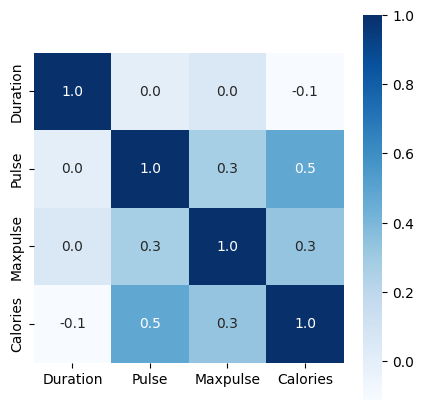

In [58]:
correlation = df.corr()

plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')